## Linear Regression

### lấy dữ liệu

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### lấy dữ liệu (bỏ ô này nếu chạy trên local)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


#### đọc dữ liệu đã tiền xử lí, chú ý cần thay đổi đường dẫn cho phù hợp

In [ ]:
path = '/content/drive/MyDrive/MachineLearning/data/preprocessed_data.csv'
df = pd.read_csv(path)
df.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
0,4085,6.67,1440,3120,256.0,48.0,16.0,12.0,6.476939,1,1,0,1,0,0
1,4000,6.50,1080,2400,64.0,64.0,16.0,6.0,5.733306,1,1,0,1,0,0
2,3110,6.10,828,1792,64.0,12.0,12.0,4.0,6.540886,1,1,1,0,0,1
3,4000,6.40,1080,2340,128.0,12.0,32.0,6.0,6.311535,0,0,0,1,0,0
4,3800,6.55,1080,2400,128.0,48.0,16.0,8.0,5.953841,1,1,0,1,0,0


#### dữ liệu dùng chung cho tất cả các kịch bản

In [ ]:
X = df.drop('Price_log', axis = 1)
y = df['Price_log']

### 1. Thực hiện trên dữ liệu gốc


#### train:test = 4:1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# chuẩn hóa dữ liệu(lưu ý chỉ chuẩn hóa các cột dữ liệu liên tục)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Ghép lại các cột nhị phân không chuẩn hóa
X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg2 = LinearRegression(fit_intercept=False)

lin_reg1.fit(X_train_scaled, y_train)
lin_reg2.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train1 = lin_reg1.predict(X_train_scaled)
y_pred_test1 = lin_reg1.predict(X_test_scaled)
y_pred_train2 = lin_reg2.predict(X_train_scaled)
y_pred_test2 = lin_reg2.predict(X_test_scaled)

# Đánh giá
print("MÔ HÌNH 1: có hệ số chệch bias")
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(num_cols + bin_cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

print("\n\nMÔ HÌNH 2: không có hệ số chệch bias")
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train2))
print("R2:", r2_score(y_train, y_pred_train2))
print("MAE:", mean_absolute_error(y_train, y_pred_train2))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test2))
print("R2:", r2_score(y_test, y_pred_test2))
print("MAE:", mean_absolute_error(y_test, y_pred_test2))



MÔ HÌNH 1: có hệ số chệch bias
Hiệu suất trên tập TRAIN:
MSE: 0.18805677562312123
R2: 0.6349173741280805
MAE: 0.3237775129148946

Hiệu suất trên tập TEST:
MSE: 0.2208989147614652
R2: 0.6131449564845957
MAE: 0.35710461273058447

Các hệ số (β) của mô hình:
β0 (intercept): 4.61232474724975
β (Screen size): 0.019875918950532052
β (Resolution x): 0.15717286118851995
β (Resolution y): 0.12903052423928316
β (Storage): 0.08717646563782043
β (Rear camera): 0.05369115670718569
β (Front camera): -0.06900210325973367
β (RAM): 0.2061549199216735
β (Battery capacity): 0.014477982749928411
β (SIM_2): -0.17632675953083432
β (4G_Yes): 0.0007334914161293768
β (CPU_4_6): -0.008474854420119068
β (CPU_8_10): 0.000996139060245066
β (OSs_Other): 0.3119541955380168
β (OSs_iOS): 1.2360633355075294


MÔ HÌNH 2: không có hệ số chệch bias
Hiệu suất trên tập TRAIN:
MSE: 1.0086320476164707
R2: -0.9581003410393394
MAE: 0.6600951739554894

Hiệu suất trên tập TEST:
MSE: 0.902410880841085
R2: -0.5803708268713121
MAE: 0

#### train:test = 7:3

MÔ HÌNH 1: có hệ số chệch bias
Hiệu suất trên tập TRAIN:
MSE: 0.1942602634158378
R2: 0.6308449099741471
MAE: 0.32791907770854695

Hiệu suất trên tập TEST:
MSE: 0.1964407858518389
R2: 0.6261591856284926
MAE: 0.3390689532561915

Các hệ số (β) của mô hình:
β0 (intercept): 4.63470187064533
β (Screen size): 0.012623180173075382
β (Resolution x): 0.14541923416423286
β (Resolution y): 0.14922703828989853
β (Storage): 0.07893077629520193
β (Rear camera): 0.05342052314340713
β (Front camera): -0.06655036657633291
β (RAM): 0.20786888555852107
β (Battery capacity): 0.013382223072074317
β (SIM_2): -0.18727709105233575
β (4G_Yes): 0.016123080676400524
β (CPU_4_6): -0.020549208608729146
β (CPU_8_10): -0.012244934533872917
β (OSs_Other): 0.28913523887362813
β (OSs_iOS): 1.255544997972217
Index(['Screen size', 'Resolution x', 'Resolution y', 'Storage', 'Rear camera',
       'Front camera', 'RAM', 'Battery capacity', 'SIM_2', '4G_Yes', 'CPU_4_6',
       'CPU_8_10', 'OSs_Other', 'OSs_iOS'],
      dtype=

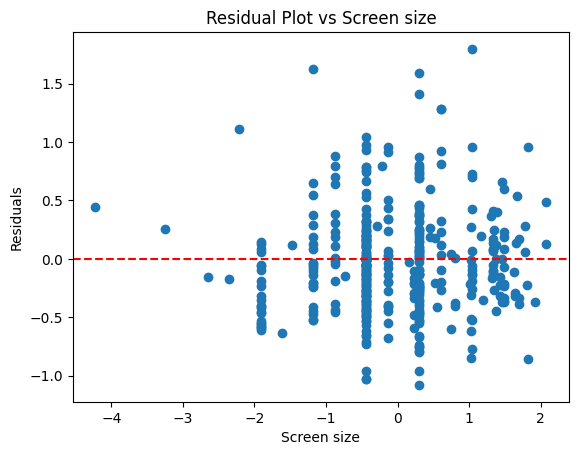

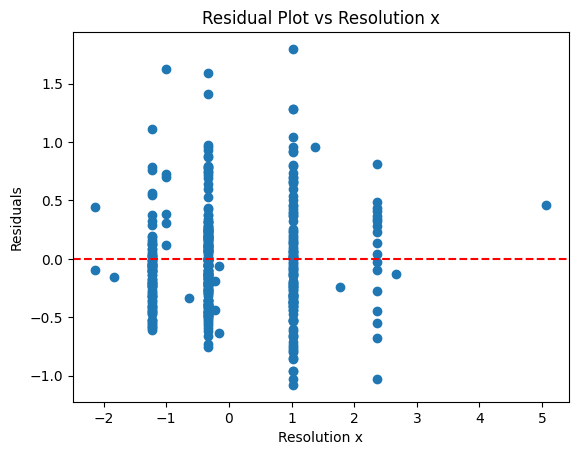

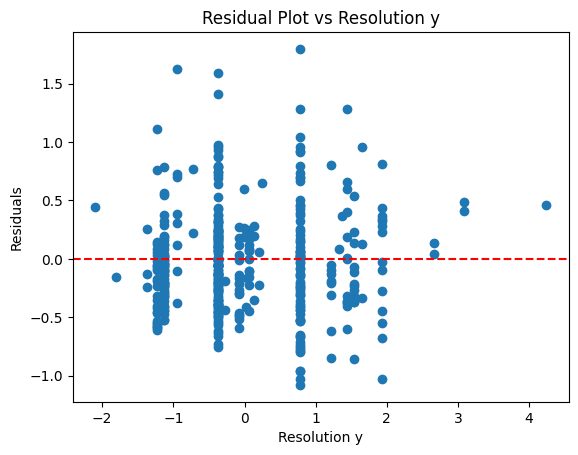

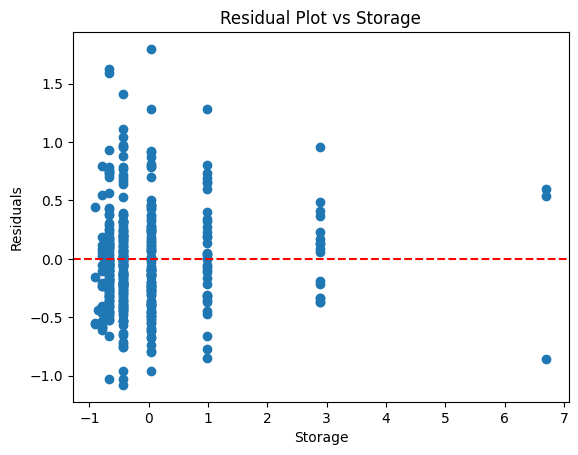

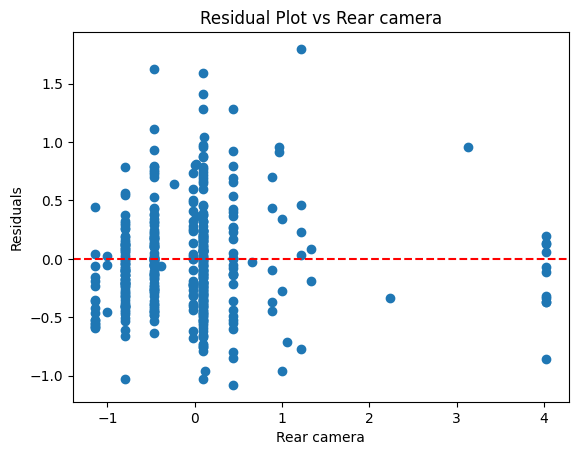

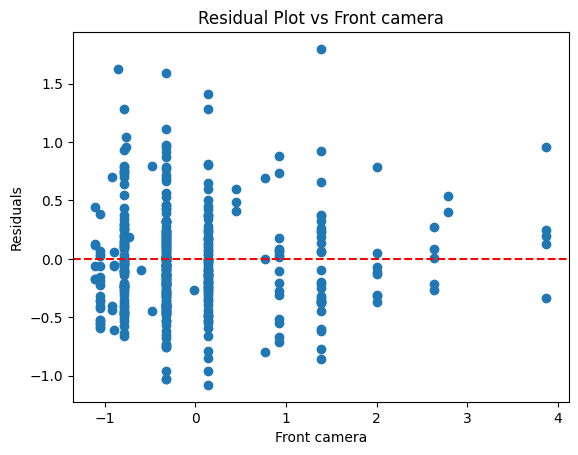

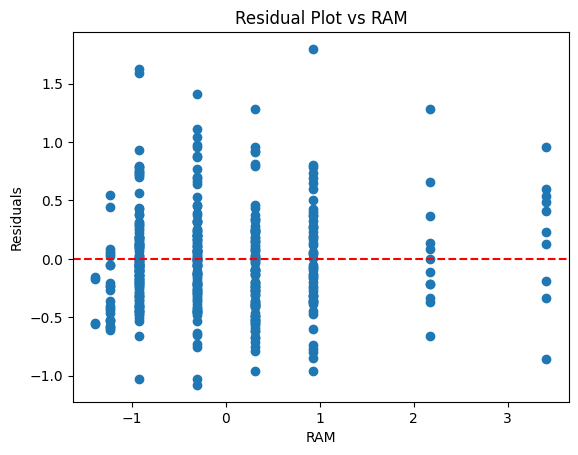

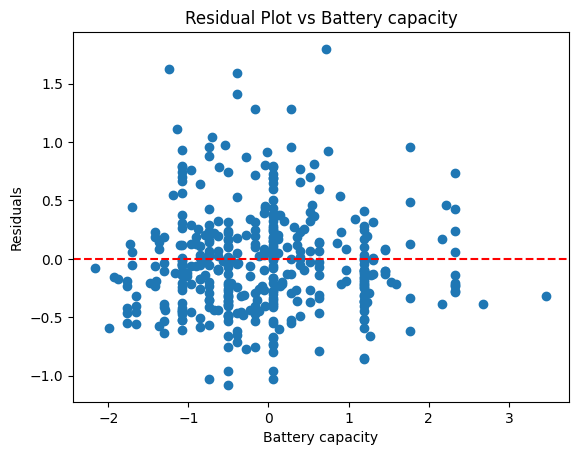

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# chuẩn hóa dữ liệu (lưu ý chỉ chuẩn hóa các cột dữ liệu liên tục)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Ghép lại các cột nhị phân không chuẩn hóa
X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

lin_reg1 = LinearRegression(fit_intercept=True)

lin_reg1.fit(X_train_scaled, y_train)
# Dự đoán
y_pred_train1 = lin_reg1.predict(X_train_scaled)
y_pred_test1 = lin_reg1.predict(X_test_scaled)


# Đánh giá
print("MÔ HÌNH 1: có hệ số chệch bias")
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(num_cols + bin_cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

residual = y_test - y_pred_test1
# plt.scatter(X_test_scaled["RAM"], residual)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('RAM')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols + bin_cols)
features = X_test_scaled_df.columns.tolist()
print(X_test_scaled_df.columns)
for i in range(0,8):
    plt.scatter(X_test_scaled[:,i], residual)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(features[i])
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot vs {features[i]}')
    plt.show()

#### train:test = 6:4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# chuẩn hóa dữ liệu (lưu ý chỉ chuẩn hóa các cột dữ liệu liên tục)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Ghép lại các cột nhị phân không chuẩn hóa
X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train1 = lin_reg1.predict(X_train_scaled)
y_pred_test1 = lin_reg1.predict(X_test_scaled)

# Đánh giá
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(num_cols + bin_cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")



Hiệu suất trên tập TRAIN:
MSE: 0.1898682881763865
R2: 0.6348416980677699
MAE: 0.3234494024444048

Hiệu suất trên tập TEST:
MSE: 0.20353640799934905
R2: 0.620027869614137
MAE: 0.33943842255464257

Các hệ số (β) của mô hình:
β0 (intercept): 4.642067001800129
β (Screen size): 0.00745174732802005
β (Resolution x): 0.1436282522970658
β (Resolution y): 0.16684123619184507
β (Storage): 0.08191682364298117
β (Rear camera): 0.05272858459143018
β (Front camera): -0.07153360585100897
β (RAM): 0.2115735172347675
β (Battery capacity): 0.016241289499180994
β (SIM_2): -0.16988484305647547
β (4G_Yes): 0.01714784248739599
β (CPU_4_6): -0.038308175022836295
β (CPU_8_10): -0.05817671130879623
β (OSs_Other): 0.3283107787695215
β (OSs_iOS): 1.1716456631784689


### 2. Thực hiện trên dữ liệu đã giảm chiều


### TH1: Giảm chiều bằng PCA, giữ 4 thành phần chính đầu tiên

#### train:test = 4:1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)

lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)


print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.2176130508528235
R2: 0.5775385185346092
MAE: 0.3463417057345302

Hiệu suất trên tập TEST:
MSE: 0.24567506838688669
R2: 0.5697550647811586
MAE: 0.38099131374304257

Các hệ số (β) của mô hình:
β0 (intercept): 4.483049814884443
β (PC1): 0.21549473107723258
β (PC2): 0.20431670512298666
β (PC3): -0.052263571125411634
β (PC4): 0.00021262959967471157


#### train:test = 7:3

Hiệu suất trên tập TRAIN:
MSE: 0.22400861755578513
R2: 0.5743137586334047
MAE: 0.3515050713772944

Hiệu suất trên tập TEST:
MSE: 0.2205869289841234
R2: 0.5802073545290565
MAE: 0.35958570191345224

Các hệ số (β) của mô hình:
β0 (intercept): 4.495220691771526
β (PC1): 0.21619159938804502
β (PC2): 0.2129029538353516
β (PC3): -0.04946230340708238
β (PC4): 0.009224897567905413


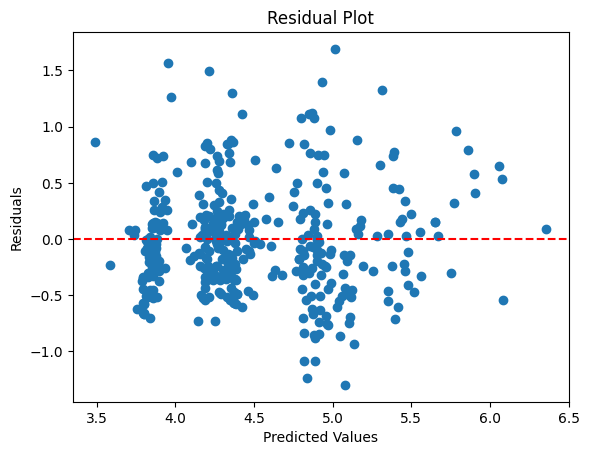

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)


print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

residual = y_test - y_pred_test1
plt.scatter(y_pred_test1, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### train:test = 6:4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)

print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.21741349517891073
R2: 0.5818662322223658
MAE: 0.3466148049329255

Hiệu suất trên tập TEST:
MSE: 0.23041439914163864
R2: 0.5698506671410501
MAE: 0.359244323821666

Các hệ số (β) của mô hình:
β0 (intercept): 4.489857617439259
β (PC1): 0.2153982060455098
β (PC2): 0.2193703023360472
β (PC3): -0.05526682545268309
β (PC4): -0.01685587185888654


### TH2: Giảm chiều bằng PCA, giữ lại 6 thành phần chính đầu

#### train:test = 4:1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)

print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))


print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.2114757053881002
R2: 0.5894532086100932
MAE: 0.3418052060157798

Hiệu suất trên tập TEST:
MSE: 0.2418655263858166
R2: 0.5764266255635604
MAE: 0.3754842505734054
β0 (intercept): 4.483049814884443
β (PC1): 0.21549473107723258
β (PC2): 0.20431670512298666
β (PC3): -0.05226357112541168
β (PC4): 0.00021262959967431952
β (PC5): -0.1334317178613631
β (PC6): -0.022140081012608993


#### train:test = 7:3

Hiệu suất trên tập TRAIN:
MSE: 0.21875722670561434
R2: 0.5842930391510368
MAE: 0.3470423620547338

Hiệu suất trên tập TEST:
MSE: 0.21434524320778886
R2: 0.5920857273606326
MAE: 0.35418126424980734

Các hệ số (β) của mô hình:
β0 (intercept): 4.495220691771526
β (PC1): 0.21619159938804502
β (PC2): 0.21290295383535185
β (PC3): -0.04946230340708216
β (PC4): 0.009224897567905635
β (PC5): -0.12403397214159363
β (PC6): -0.02450907414594916


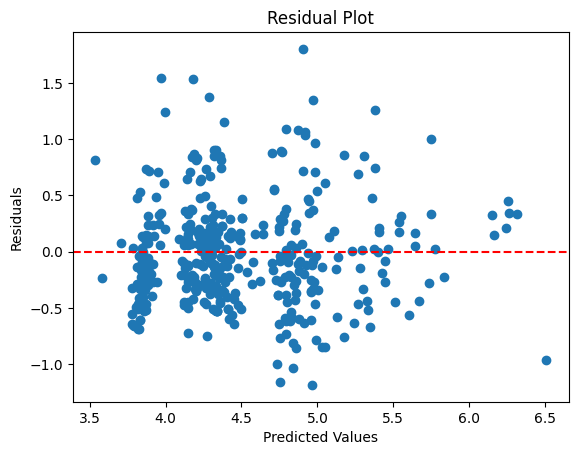

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)


print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

residual = y_test - y_pred_test1
plt.scatter(y_pred_test1, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### train:test = 6:4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)

lin_reg1.fit(X_train_pca, y_train)
lin_reg2.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)

print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.21165210651920424
R2: 0.5929466444384153
MAE: 0.34202335615832813

Hiệu suất trên tập TEST:
MSE: 0.22633258726331826
R2: 0.5774708013985275
MAE: 0.35563650715240946

Các hệ số (β) của mô hình:
β0 (intercept): 4.489857617439259
β (PC1): 0.2153982060455098
β (PC2): 0.21937030233604715
β (PC3): -0.055266825452683015
β (PC4): -0.016855871858886567
β (PC5): -0.12778664327746395
β (PC6): -0.031001594717364772
